In [1]:
import pandas as pd
from matplotlib import pyplot as plt, ticker

### Importando os dados de exportação de vinhos

In [106]:
expVinho = pd.read_csv("data/ExpVinho.csv", sep=";", thousands=".", decimal=",")
expVinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Criando o Dataframe de valores em Litros

In [121]:
expVinhoLitros = pd.concat([expVinho["País"], expVinho[expVinho.iloc[:,0::2].columns]], axis=1)
expVinhoLitros.set_index("País", inplace=True)
expVinhoLitros = expVinhoLitros.iloc[:,-15:] # ultimos 15 anos
expVinhoLitros['Total'] = expVinhoLitros.sum(numeric_only=True, axis=1)
expVinhoLitros.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,11
África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,147
"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,648115
Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,143147
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Criando o Dataframe de valores em USS

In [119]:
expVinhoValor = expVinho.iloc[:,1::2]
expVinhoValor.columns = expVinhoValor.columns.str[0:4] # remove o .1 do nome da coluna
expVinhoValor.set_index("País", inplace=True)
expVinhoValor = expVinhoValor.iloc[:,-15:] # ultimos 15 anos
expVinhoValor['Total'] = expVinhoValor.sum(numeric_only=True, axis=1)
expVinhoValor.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,46
África do Sul,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698,814
"Alemanha, República Democrática",393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,2148277
Angola,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,505106
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Top 10 exportações do Brasil em litros

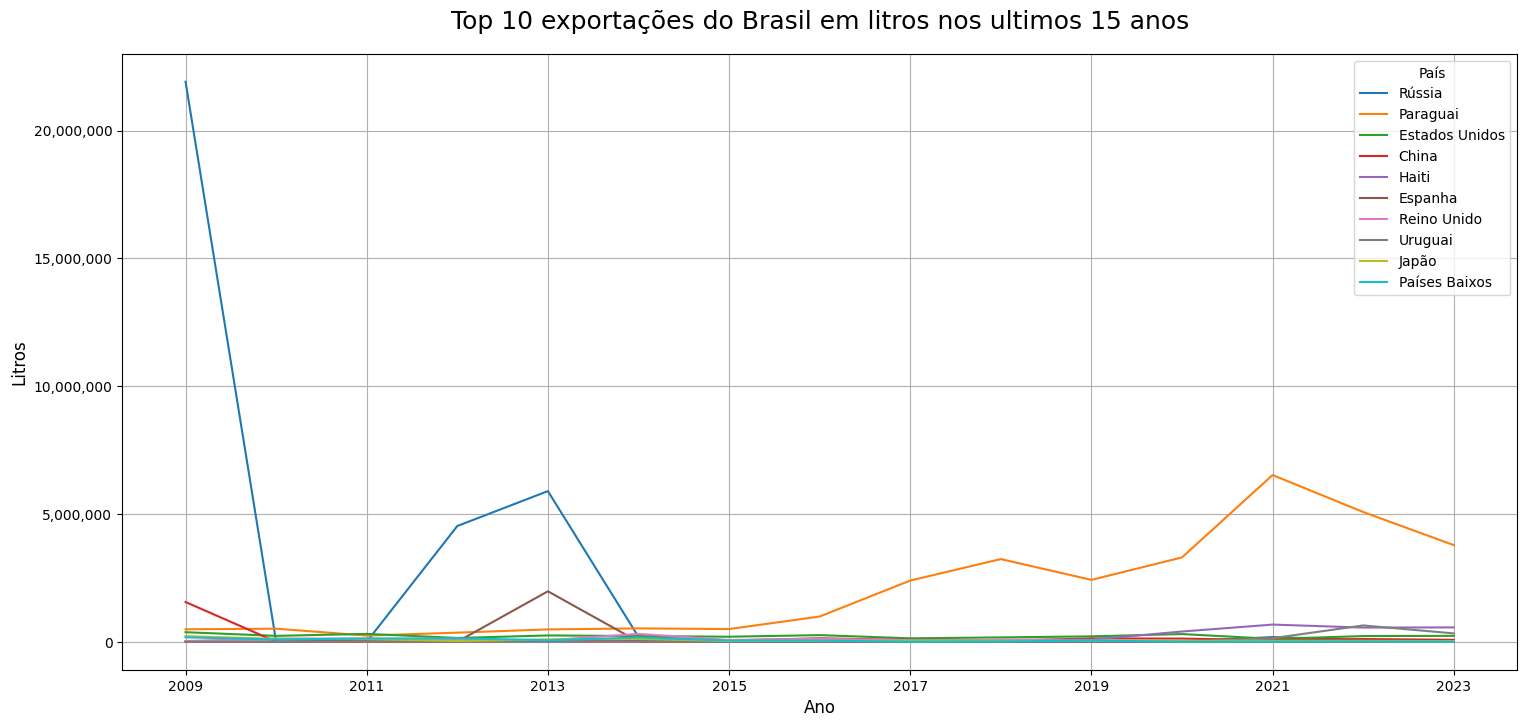

In [122]:
df_plot = expVinhoLitros.sort_values(by="Total", ascending=False).head(10).iloc[: , :-1].T.iloc[0:] # remove a coluna total

axis = df_plot.plot(figsize=(18,8))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_xlabel('Ano', fontsize=12)
axis.set_ylabel('Litros', fontsize=12)
plt.title("Top 10 exportações do Brasil em litros nos ultimos 15 anos", fontsize=18, pad=18)
axis.grid(True)
plt.show()

### Top 10 exportações do Brasil em USS

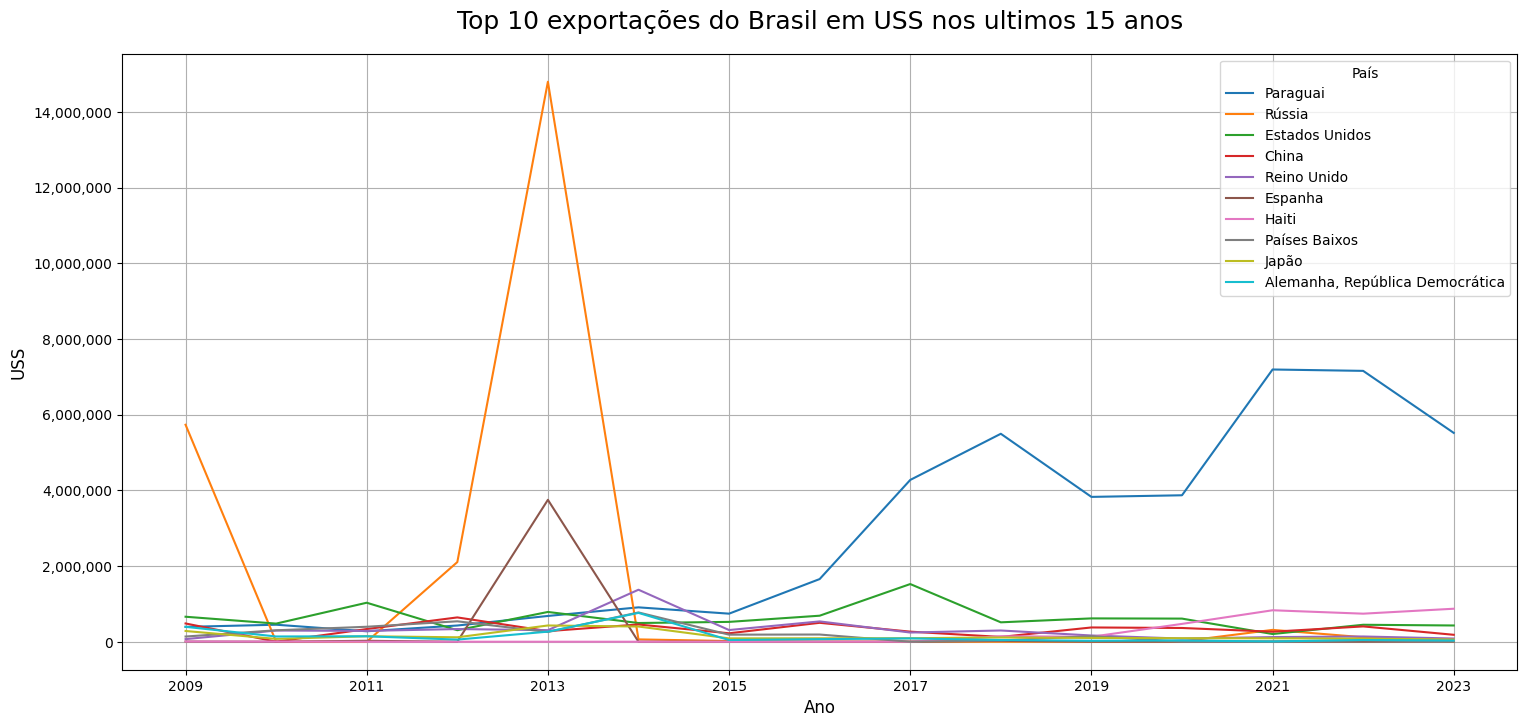

In [124]:
df_plot = expVinhoValor.sort_values(by="Total", ascending=False).head(10).iloc[: , :-1].T.iloc[0:] # remove a coluna total

axis = df_plot.plot(figsize=(18,8))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_xlabel('Ano', fontsize=12)
axis.set_ylabel('USS', fontsize=12)
plt.title("Top 10 exportações do Brasil em USS nos ultimos 15 anos", fontsize=18, pad=18)
axis.grid(True)
plt.show()